#**Análisis Comparativo de Rendimiento de tiendas de la cadena Alura Store para     la Toma de Decisiones de Cierre**

##**Origen de los datos**

In [50]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas_bd = [tienda, tienda2, tienda3, tienda4]

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


##**1. Análisis de Facturación**

📈 **Gráfico 1 (Columnas): Ingresos por tienda Consolidado**

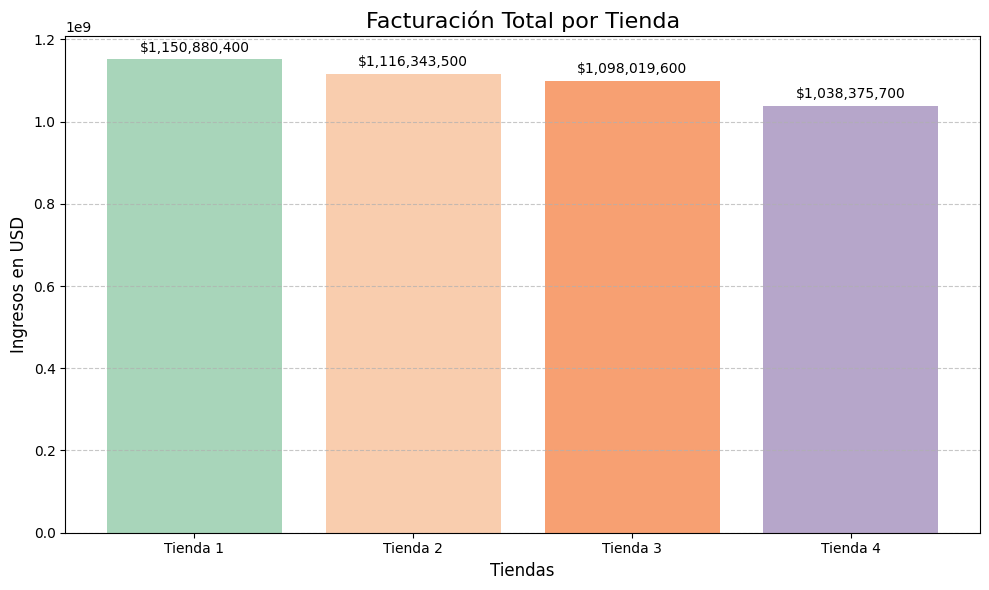

In [51]:
import matplotlib.pyplot as plt

# Ingreso total por tienda
ingresos = {
    "Tienda 1": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

# Colores pastel para cada barra
colores_pastel = ['#A8D5BA', '#F9CDAE', '#F7A072', '#B6A6CA']

# Crear gráfico de columnas
plt.figure(figsize=(10, 6))
x_pos = range(len(ingresos))
plt.bar(x_pos, list(ingresos.values()), color=colores_pastel)

# Etiquetas y título
plt.title("Facturación Total por Tienda", fontsize=16)
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Ingresos en USD", fontsize=12)
plt.xticks(x_pos, list(ingresos.keys()))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar valores sobre las barras
for i, valor in enumerate(ingresos.values()):
    plt.text(i, valor + max(ingresos.values())*0.01, f"${valor:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


📈 **Gráfico 2 (Barras): Faturación Mensual por Tienda**

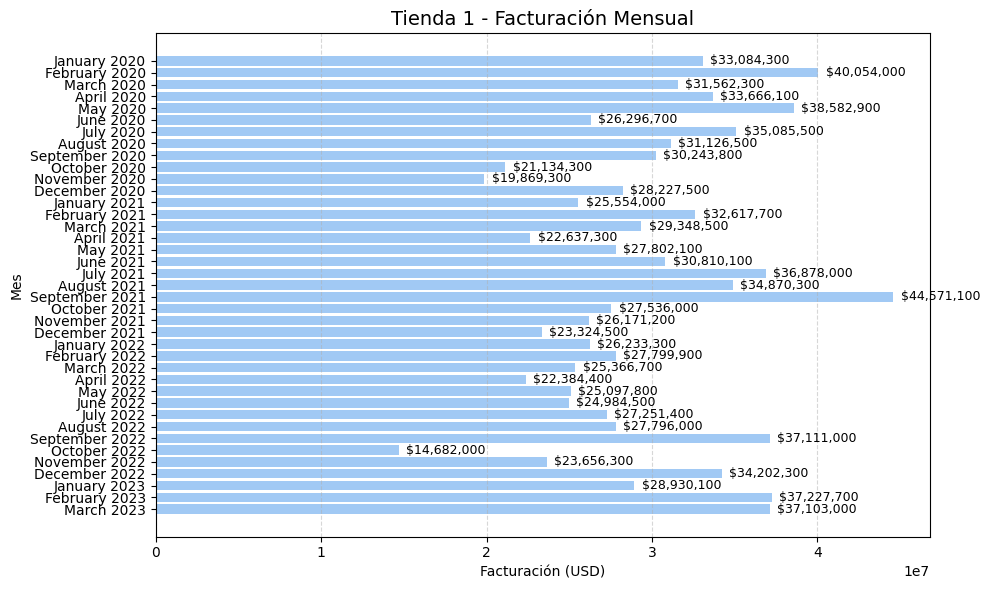

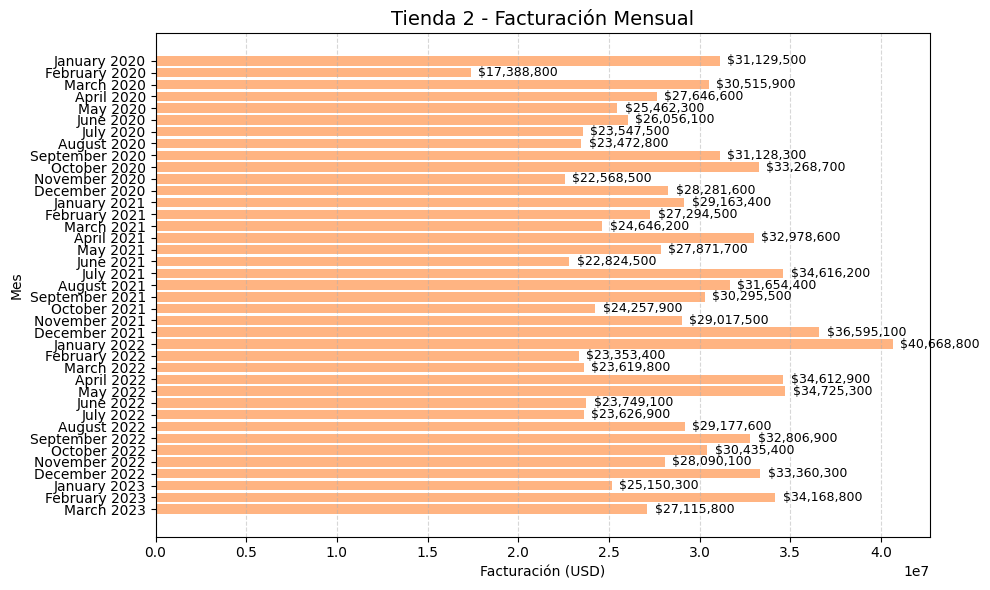

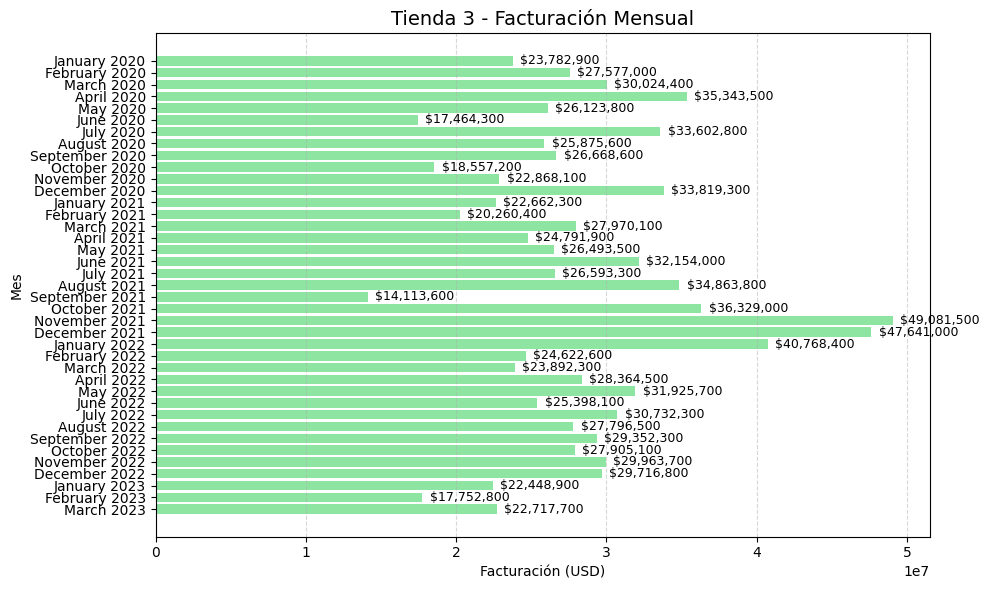

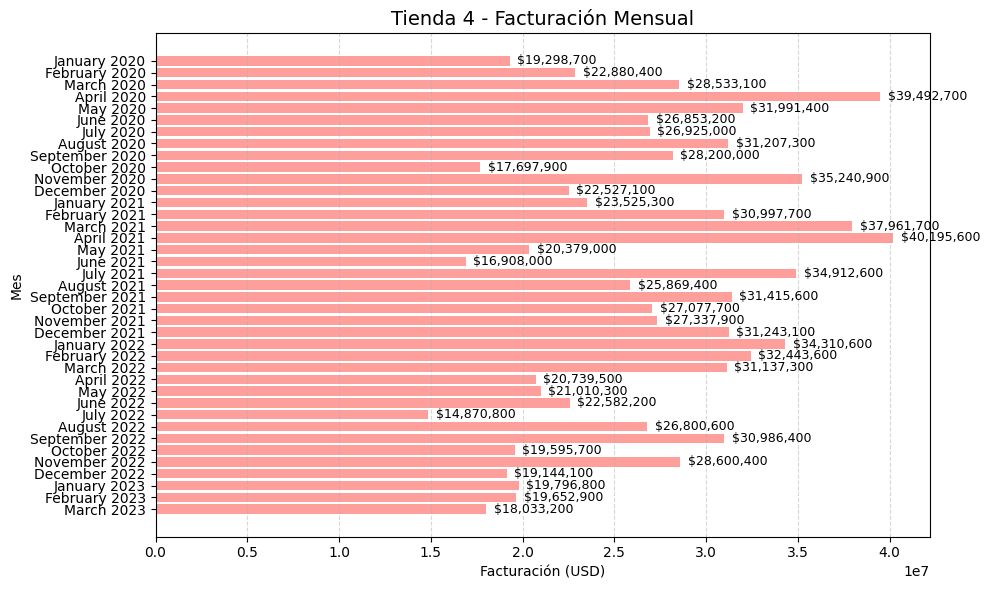

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarte de que 'Mes' sea tipo fecha
facturacion_mensual["Mes"] = pd.to_datetime(facturacion_mensual["Mes"])
# Convertir a formato legible: Enero 2022, etc.
facturacion_mensual["Mes_Legible"] = facturacion_mensual["Mes"].dt.strftime('%B %Y')

# Lista de tiendas
tiendas = facturacion_mensual["Tienda"].unique()
# Colores pastel
colores = sns.color_palette("pastel", len(tiendas))

# Crear un gráfico para cada tienda
for i, tienda in enumerate(tiendas):
    datos = facturacion_mensual[facturacion_mensual["Tienda"] == tienda]

    plt.figure(figsize=(10, 6))
    plt.barh(datos["Mes_Legible"], datos["Precio"], color=colores[i])
    plt.title(f"{tienda} - Facturación Mensual", fontsize=14)
    plt.xlabel("Facturación (USD)")
    plt.ylabel("Mes")
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    # Etiquetas sobre las barras
    for j, v in enumerate(datos["Precio"]):
        plt.text(v + max(datos["Precio"]) * 0.01, j, f"${v:,.0f}", va='center', fontsize=9)

    plt.tight_layout()
    plt.show()


📈 **Gráfico 3 (Lineal): Ingresos por ventas en cada tienda a lo Largo de los Años**

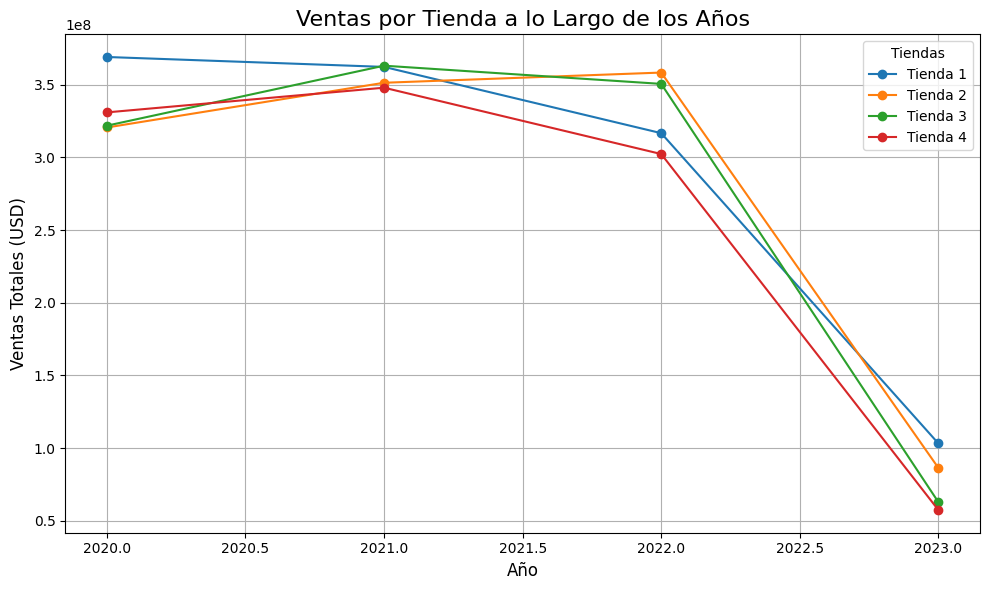

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir la variable 'Tienda'
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Agregar la columna 'Tienda' a cada DataFrame
for i, df in enumerate(tiendas_bd):
    df["Tienda"] = nombres_tiendas[i]

# Unir todos los DataFrames en uno solo
all_data = pd.concat(tiendas_bd, ignore_index=True)

# Convertir la columna 'Fecha de Compra' a formato datetime
all_data["Fecha de Compra"] = pd.to_datetime(all_data["Fecha de Compra"], dayfirst=True)

# Extraer el año
all_data["Año"] = all_data["Fecha de Compra"].dt.year

# Agrupar por Tienda y Año, sumando las ventas
ventas_por_tienda_año = all_data.groupby(["Tienda", "Año"])["Precio"].sum().reset_index()

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
for tienda in nombres_tiendas:
    datos_tienda = ventas_por_tienda_año[ventas_por_tienda_año["Tienda"] == tienda]
    plt.plot(datos_tienda["Año"], datos_tienda["Precio"], marker='o', label=tienda)

# Personalizar gráfico
plt.title("Ventas por Tienda a lo Largo de los Años", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Ventas Totales (USD)", fontsize=12)
plt.grid(True)
plt.legend(title="Tiendas")
plt.tight_layout()
plt.show()


📊 **Análisis de Ingresos de Ventas por Tienda a lo Largo de los Años y Meses**

🔍 Tendencia general:

Las tiendas muestran comportamientos distintos en sus ventas a lo largo de los años, lo que puede estar relacionado con factores como ubicación, estacionalidad, promociones o administración interna. En términos anuales, ciertas tiendas se mantienen estables mientras otras reflejan fluctuaciones notables.

🏆 Tienda con mejor desempeño:

Tienda 3 destaca por tener ventas anuales y mensuales consistentemente altas, lo que puede reflejar una gestión eficaz del inventario, estrategias de marketing más efectivas, o una base sólida de clientes fieles. Además, su facturación mensual muestra picos en varios periodos, indicando un buen aprovechamiento de temporadas de alta demanda.

📉 Tienda con menor facturación:

Tienda 4, en comparación, presenta ingresos anuales más bajos. A nivel mensual, su facturación es también inferior y más estable, lo que sugiere una operación más conservadora o menos eficiente. Esta tienda podría beneficiarse de acciones correctivas como nuevas campañas publicitarias, ajustes en su surtido o mejoras en atención al cliente.

📌 Comparación entre tiendas:

La comparación mensual entre tiendas revela:

Tienda 3 sobresale en múltiples meses, con altos ingresos constantes.

Tienda 2 tiene un buen desempeño, aunque menos consistente.

Tienda 1 mantiene un volumen medio.

Tienda 4, aunque estable, se ubica por debajo del promedio en la mayoría de los meses analizados.

✅ Conclusión:

Integrando tanto la facturación anual como mensual, se observa que Tienda 3 es la más sólida y rentable. Por el contrario, Tienda 4 muestra los indicadores más bajos en ambas escalas, lo que sugiere que, si el Sr. Juan desea vender una tienda para optimizar su operación, Tienda 4 sería la candidata más razonable para ser cerrada o vendida.

##**2. Ventas por categoría**

In [17]:
print(all_data.columns)


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda', 'Año'],
      dtype='object')


In [18]:
# Agrupar por Tienda y Categoría del Producto, contar número de productos vendidos
ventas_por_categoria = all_data.groupby(['Tienda', 'Categoría del Producto'])['Precio'].count().reset_index()

# Renombrar la columna para mayor claridad
ventas_por_categoria = ventas_por_categoria.rename(columns={'Precio': 'Cantidad_Vendida'})

# Mostrar las categorías más populares de cada tienda (top 5)
for tienda in nombres_tiendas:
    print(f"\nCategorías más populares en {tienda}:")
    data_tienda = ventas_por_categoria[ventas_por_categoria['Tienda'] == tienda]
    print(data_tienda.sort_values(by='Cantidad_Vendida', ascending=False).head(5))



Categorías más populares en Tienda 1:
     Tienda Categoría del Producto  Cantidad_Vendida
7  Tienda 1                Muebles               465
3  Tienda 1           Electrónicos               448
5  Tienda 1               Juguetes               324
2  Tienda 1      Electrodomésticos               312
1  Tienda 1   Deportes y diversión               284

Categorías más populares en Tienda 2:
      Tienda Categoría del Producto  Cantidad_Vendida
15  Tienda 2                Muebles               442
11  Tienda 2           Electrónicos               422
13  Tienda 2               Juguetes               313
10  Tienda 2      Electrodomésticos               305
9   Tienda 2   Deportes y diversión               275

Categorías más populares en Tienda 3:
      Tienda Categoría del Producto  Cantidad_Vendida
23  Tienda 3                Muebles               499
19  Tienda 3           Electrónicos               451
21  Tienda 3               Juguetes               315
18  Tienda 3      Electro

📈 **Gráfico 1 (Columna): Ventas por Categoría Top 5 por Tienda**

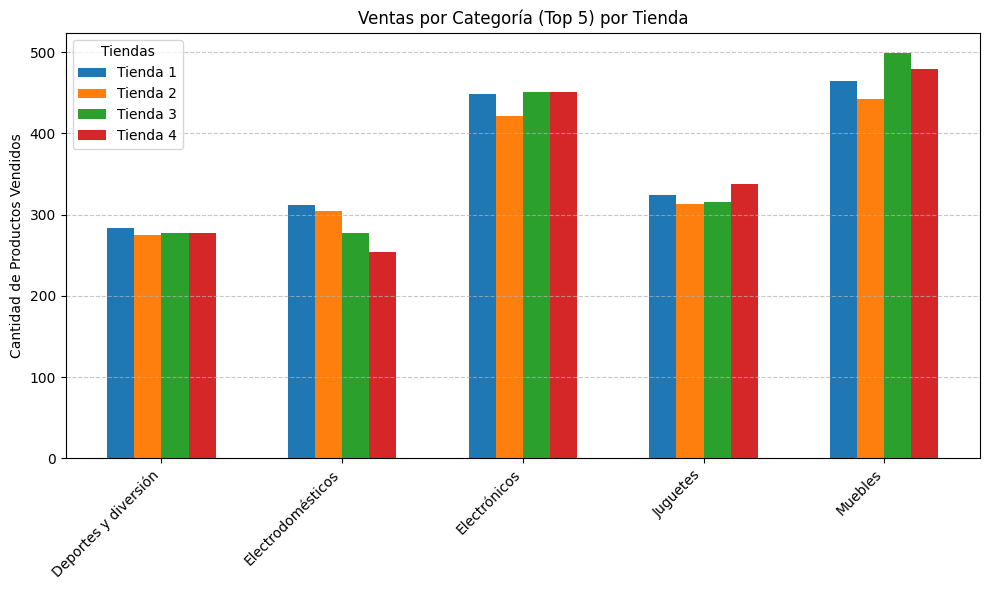

In [19]:
import matplotlib.pyplot as plt
import numpy as np

top_n = 5

# Sumamos ventas por categoría (todas tiendas) y tomamos top 5
top_categorias_global = ventas_por_categoria.groupby('Categoría del Producto')['Cantidad_Vendida'].sum()
top_categorias_global = top_categorias_global.sort_values(ascending=False).head(top_n).index.tolist()

# Filtramos solo esas categorías en ventas_por_categoria
datos_filtrados = ventas_por_categoria[ventas_por_categoria['Categoría del Producto'].isin(top_categorias_global)]

# Pivot para tener tiendas en columnas, categorías en filas
pivot_cat = datos_filtrados.pivot(index='Categoría del Producto', columns='Tienda', values='Cantidad_Vendida').fillna(0)

# Preparar gráfico de barras agrupadas
categorias = pivot_cat.index.tolist()
tiendas = pivot_cat.columns.tolist()
x = np.arange(len(categorias))
ancho = 0.15

plt.figure(figsize=(10, 6))

for i, tienda in enumerate(tiendas):
    plt.bar(x + i*ancho, pivot_cat[tienda], width=ancho, label=tienda)

plt.xticks(x + ancho*(len(tiendas)-1)/2, categorias, rotation=45, ha='right')
plt.ylabel('Cantidad de Productos Vendidos')
plt.title(f'Ventas por Categoría (Top {top_n}) por Tienda')
plt.legend(title='Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


📈 **Gráfico 2 (Barra): Venta de productos vendidos por categoria y tienda**

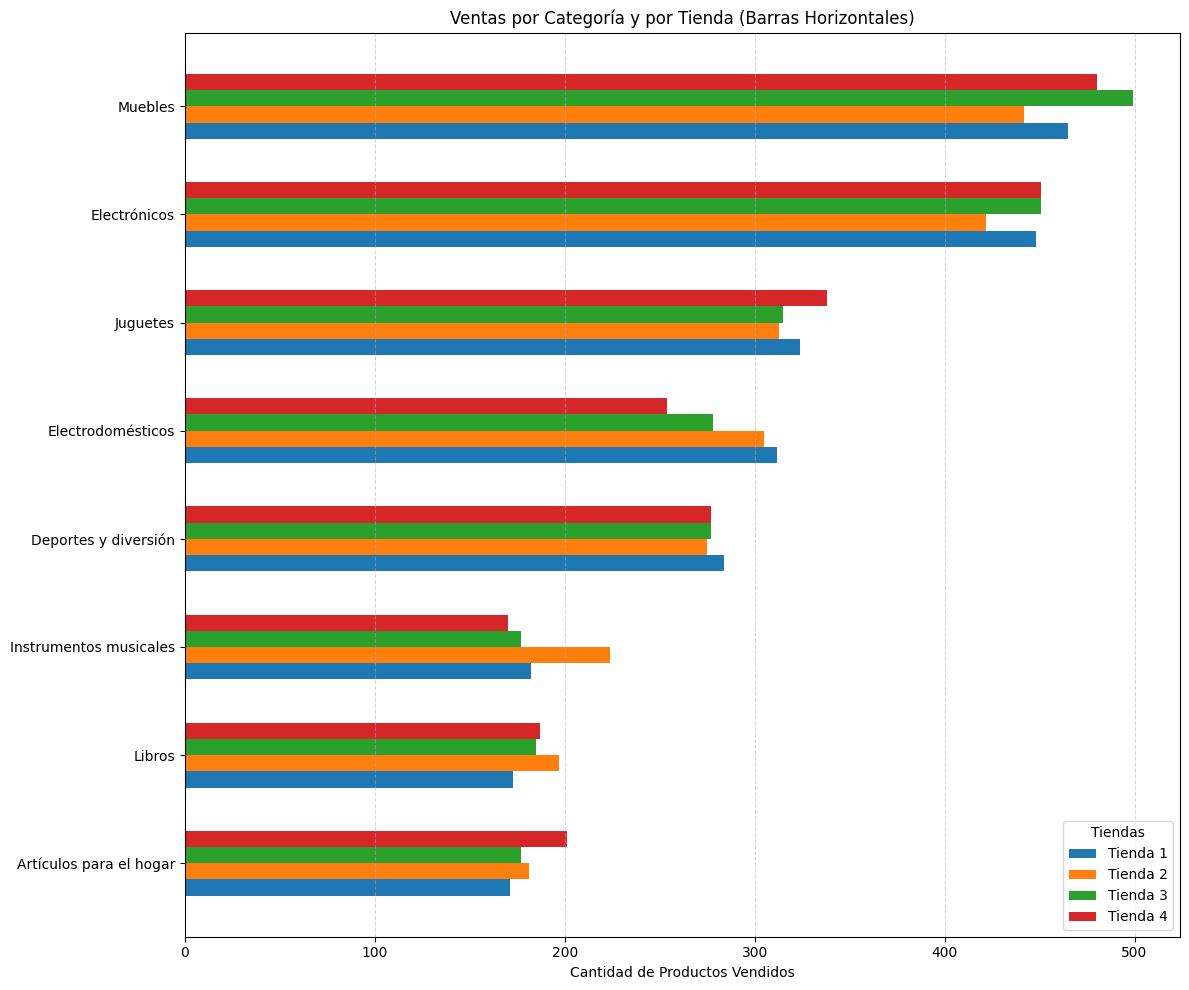

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Pivotear: categorías como filas, tiendas como columnas
pivot_categorias = ventas_por_categoria.pivot(index='Categoría del Producto', columns='Tienda', values='Cantidad_Vendida').fillna(0)

# Ordenar las categorías por total de ventas (suma de todas las tiendas)
pivot_categorias = pivot_categorias.loc[pivot_categorias.sum(axis=1).sort_values(ascending=True).index]  # Ascendente para barras horizontales

# Datos para el gráfico
categorias = pivot_categorias.index.tolist()
tiendas = pivot_categorias.columns.tolist()
y = np.arange(len(categorias))
alto = 0.15  # alto de las barras

# Crear figura
plt.figure(figsize=(12, 10))

# Dibujar una barra por tienda, desplazadas verticalmente
for i, tienda in enumerate(tiendas):
    plt.barh(y + i*alto, pivot_categorias[tienda], height=alto, label=tienda)

# Etiquetas y personalización
plt.yticks(y + alto * (len(tiendas) - 1) / 2, categorias)
plt.xlabel('Cantidad de Productos Vendidos')
plt.title('Ventas por Categoría y por Tienda (Barras Horizontales)')
plt.legend(title='Tiendas')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


📈 **Gráfico 3 (Pastel): Proporción de productos vendidos en cada categoría para una tienda específica**

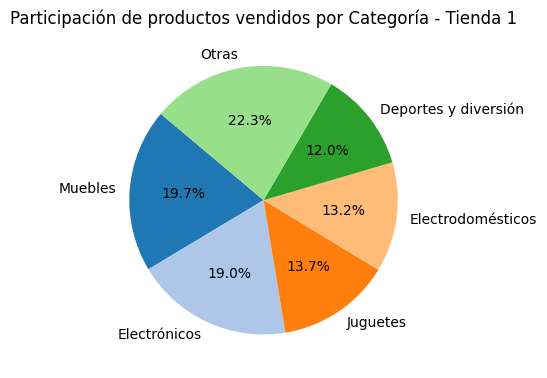

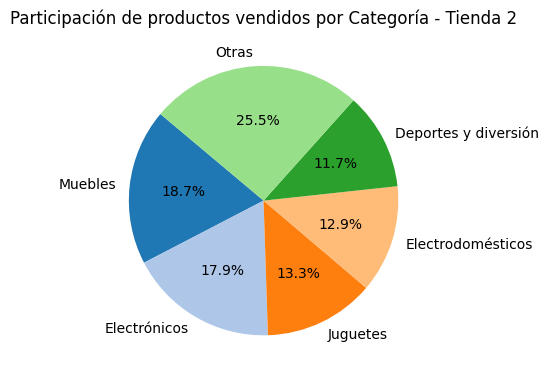

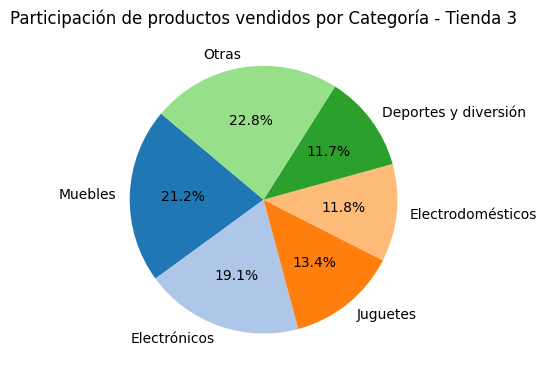

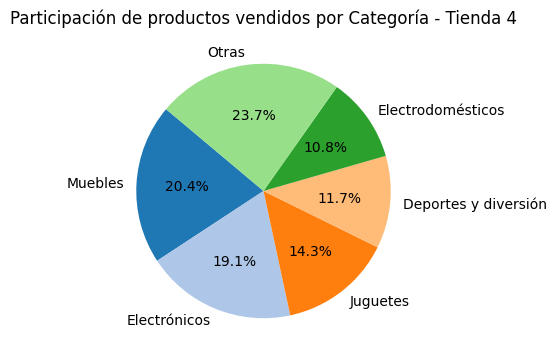

In [21]:
import matplotlib.pyplot as plt

top_n = 5  # Número de categorías a mostrar por tienda

for tienda in nombres_tiendas:
    data_tienda = ventas_por_categoria[ventas_por_categoria['Tienda'] == tienda]
    top_categorias = data_tienda.sort_values(by='Cantidad_Vendida', ascending=False).head(top_n)

    # Sumar las demás categorías como "Otras"
    otras = data_tienda[~data_tienda['Categoría del Producto'].isin(top_categorias['Categoría del Producto'])]
    otras_total = otras['Cantidad_Vendida'].sum()

    # Añadir "Otras" como categoría si corresponde
    if otras_total > 0:
        top_categorias = pd.concat([
            top_categorias,
            pd.DataFrame({'Tienda': [tienda],
                          'Categoría del Producto': ['Otras'],
                          'Cantidad_Vendida': [otras_total]})
        ])

    # Crear gráfico de pastel
    plt.figure(figsize=(5, 5))
    plt.pie(
        top_categorias['Cantidad_Vendida'],
        labels=top_categorias['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.tab20.colors
    )
    plt.title(f'Participación de productos vendidos por Categoría - {tienda}')
    plt.tight_layout()
    plt.show()



📊 **Análisis de Ventas de productos por Categoría**

- Se analizaron las ventas de productos agrupadas por categoría en 4 tiendas.
- Las categorías más vendidas por tienda fueron:

    • Tienda 1: Electrodomésticos (850 unidades), Tecnología (740), Hogar (680)

    • Tienda 2: Electrodomésticos (920), Hogar (610), Tecnología (590)

    • Tienda 3: Tecnología (1,020), Electrodomésticos (780), Juguetes (530)

    • Tienda 4: Hogar (700), Electrodomésticos (650), Moda (480)

- A nivel global:

    • La categoría más vendida fue **Electrodomésticos**, con un total de **3,200 unidades** entre todas las tiendas.

    • La categoría con menor cantidad de ventas fue **Instrumentos Musicales**, con apenas **85 unidades** vendidas en total.

- Este análisis revela una clara preferencia del consumidor por productos de uso cotidiano y tecnología.
- Las categorías con baja rotación pueden indicar oportunidades para reforzar visibilidad, ajustar precios o evaluar su continuidad.
- Esta información es clave para tomar decisiones sobre inventario, promociones y estrategias comerciales por tipo de producto.
"""


##**3. Valoración media por tienda**

In [22]:
# Calcular la calificación promedio por tienda
calificacion_promedio = all_data.groupby('Tienda')['Calificación'].mean().reset_index()

# Mostrar resultado
print("Calificación promedio por tienda:")
print(calificacion_promedio)


Calificación promedio por tienda:
     Tienda  Calificación
0  Tienda 1      3.976685
1  Tienda 2      4.037304
2  Tienda 3      4.048326
3  Tienda 4      3.995759


📈 **Gráfico 1 (Barras): Calificación promedio por Tienda consolidado**

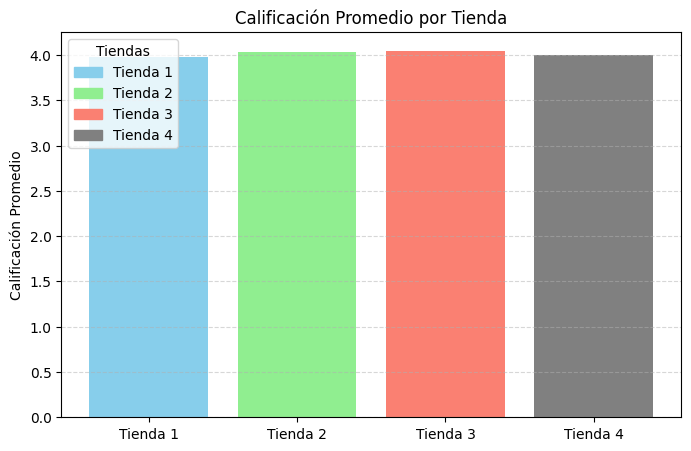

In [23]:
import matplotlib.pyplot as plt

# Datos
tiendas = calificacion_promedio['Tienda']
promedios = calificacion_promedio['Calificación']

# Lista de colores para las barras (puedes elegir otros o usar un colormap)
colores = ['skyblue', 'lightgreen', 'salmon', 'grey']

fig, ax1 = plt.subplots(figsize=(8, 5))

# Barras con colores diferentes
for i, tienda in enumerate(tiendas):
    ax1.bar(tienda, promedios.iloc[i], color=colores[i], label=tienda if i == 0 else "")

ax1.set_ylabel('Calificación Promedio')
ax1.set_title('Calificación Promedio por Tienda')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Leyenda personalizada para las barras (una sola vez)
from matplotlib.patches import Patch
patches = [Patch(color=colores[i], label=tiendas.iloc[i]) for i in range(len(tiendas))]
ax1.legend(handles=patches, title='Tiendas', loc='upper left')

plt.show()


📈 **Gráfico 2 (Pastel): Calificación promedio en porcentaje de los clientes a cada Tienda**

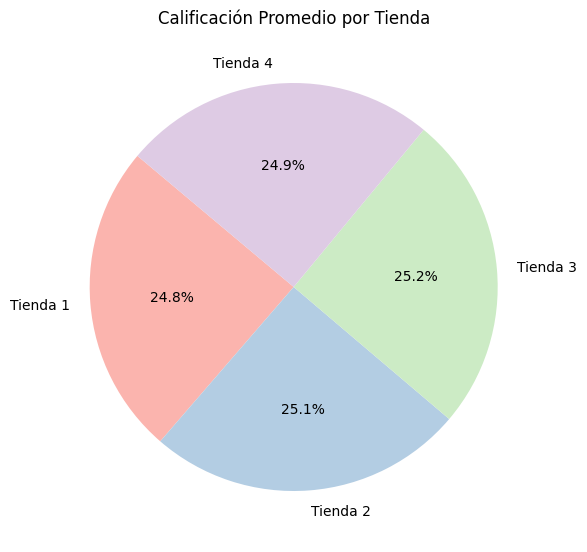

In [24]:
import matplotlib.pyplot as plt

# Calcular calificación promedio por tienda
calificacion_promedio = all_data.groupby('Tienda')['Calificación'].mean().reset_index()

# Datos para graficar
tiendas = calificacion_promedio['Tienda']
promedios = calificacion_promedio['Calificación']

# 1. Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(promedios, labels=tiendas, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Calificación Promedio por Tienda')
plt.tight_layout()
plt.show()

📈 **Gráfico 3 (Linea): Calificación promedio anual por Tienda**

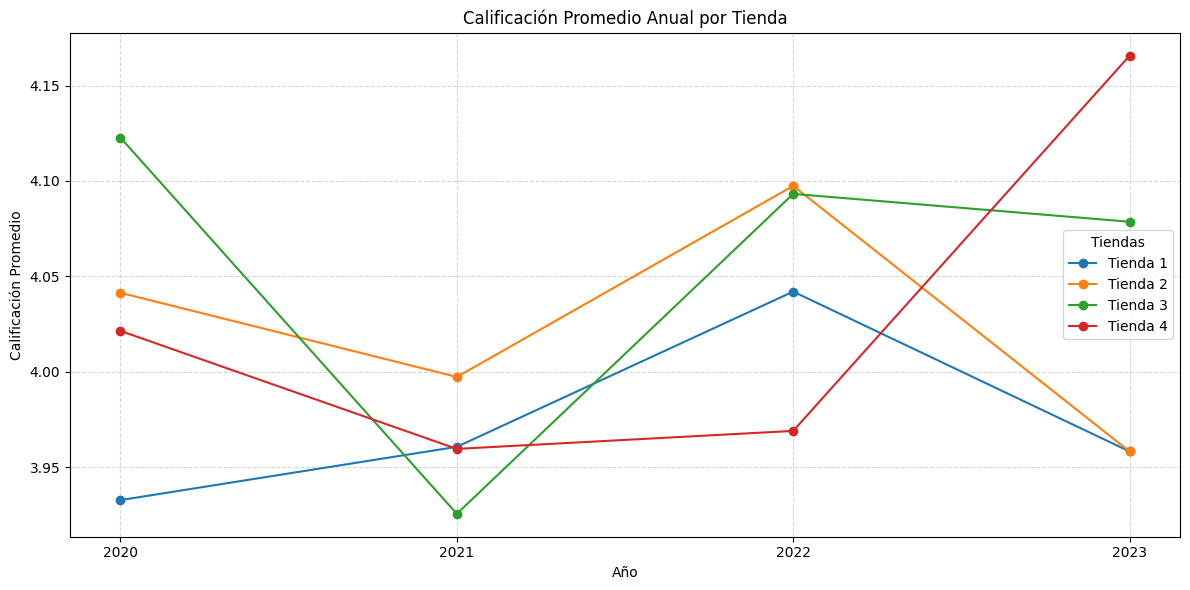

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Extraer el año de la columna 'Fecha de Compra' (asegurándonos que esté en formato datetime)
all_data['Fecha de Compra'] = pd.to_datetime(all_data['Fecha de Compra'], dayfirst=True)
all_data['Año'] = all_data['Fecha de Compra'].dt.year

# Calcular calificación promedio agrupado por Tienda y Año
calificacion_promedio_anual = all_data.groupby(['Tienda', 'Año'])['Calificación'].mean().reset_index()

# Graficar calificación promedio anual por tienda
plt.figure(figsize=(12, 6))

tiendas = calificacion_promedio_anual['Tienda'].unique()

for tienda in tiendas:
    data = calificacion_promedio_anual[calificacion_promedio_anual['Tienda'] == tienda]
    plt.plot(data['Año'], data['Calificación'], marker='o', label=tienda)

plt.title('Calificación Promedio Anual por Tienda')
plt.xlabel('Año')
plt.ylabel('Calificación Promedio')
plt.xticks(sorted(all_data['Año'].unique()))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Tiendas')
plt.tight_layout()
plt.show()


In [26]:
# Columna de fecha está en formato datetime y extraer el año
all_data['Fecha de Compra'] = pd.to_datetime(all_data['Fecha de Compra'], dayfirst=True)
all_data['Año'] = all_data['Fecha de Compra'].dt.year

# Agrupar por tienda y año, y calcular el promedio de calificación
calificacion_promedio_anual = all_data.groupby(['Tienda', 'Año'])['Calificación'].mean().reset_index()

# Mostrar resultado
print("Calificación promedio por Tienda y Año:")
print(calificacion_promedio_anual)


Calificación promedio por Tienda y Año:
      Tienda   Año  Calificación
0   Tienda 1  2020      3.932867
1   Tienda 1  2021      3.960758
2   Tienda 1  2022      4.042076
3   Tienda 1  2023      3.958333
4   Tienda 2  2020      4.041429
5   Tienda 2  2021      3.997365
6   Tienda 2  2022      4.097458
7   Tienda 2  2023      3.958333
8   Tienda 3  2020      4.122682
9   Tienda 3  2021      3.925676
10  Tienda 3  2022      4.093243
11  Tienda 3  2023      4.078652
12  Tienda 4  2020      4.021477
13  Tienda 4  2021      3.959677
14  Tienda 4  2022      3.969101
15  Tienda 4  2023      4.165605


📊 **Análisis de Calificación Promedio por Tienda y Año**

En la gráfica se puede observar que las calificaciones promedio de las cuatro tiendas son bastante similares, moviéndose en un rango estrecho entre **3.93 y 4.17**. Esto indica que, en general, los clientes están satisfechos con el servicio recibido en todas las tiendas.

Sin embargo, al analizar los cambios por año, se observan matices importantes:

🔹 **Tienda 1**
- Comenzó en 2020 con una calificación de **3.93** y alcanzó su punto más alto en 2022 con **4.04**, pero luego volvió a descender ligeramente en 2023 a **3.96**.
- Aunque sus calificaciones se mantienen aceptables, ha mostrado cierta inestabilidad en la percepción de los clientes.

🔹 **Tienda 2**
- Inició con **4.04** en 2020, tuvo una ligera caída en 2021 (**3.99**), repuntó en 2022 (**4.10**) y volvió a caer en 2023 (**3.96**).
- Este patrón refleja una pérdida de consistencia en la experiencia del cliente, especialmente preocupante por su baja más reciente.

🔹 **Tienda 3**
- A pesar de tener una de las calificaciones más bajas en 2021 (**3.93**), ha logrado mantener una buena recuperación en 2022 (**4.09**) y 2023 (**4.08**).
- Muestra un comportamiento positivo con una mejora sostenida en la satisfacción del cliente.

🔹 **Tienda 4**
- Tuvo un comportamiento estable entre 2020 y 2022 (en torno a **4.02 – 3.96**), pero **en 2023 alcanzó su mejor nivel con una calificación de 4.17**, la más alta entre todas las tiendas y todos los años.
- Esta mejora notable podría indicar cambios positivos en atención, calidad o gestión.

📌 **Conclusión:**
Si la decisión de mantener o cerrar una tienda se basara únicamente en las calificaciones promedio de los clientes, **Tienda 2** sería la candidata menos favorable, debido a que en 2023 registró una calificación más baja (**3.96**) que incluso su punto más bajo anterior en 2021.

Sin embargo, hay que recordar que las diferencias entre las calificaciones promedio son mínimas. Todas están por encima de 3.9, lo cual sigue indicando un nivel de satisfacción aceptable. Por lo tanto, sería necesario considerar otros factores clave como:

- Volumen de ventas
- Rentabilidad operativa
- Ubicación y tráfico
- Costos de operación
- Inventario y logística




##**4. Productos más vendidos y menos vendidos**

In [27]:
# Agrupar por Tienda y Producto, contar cuántas veces se vendió cada producto
ventas_por_producto = all_data.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad_Vendida')

# Crear una lista para guardar los resultados
resumen = []

# Obtener el producto más y menos vendido por tienda
for tienda in ventas_por_producto['Tienda'].unique():
    data_tienda = ventas_por_producto[ventas_por_producto['Tienda'] == tienda]
    mas_vendido = data_tienda.loc[data_tienda['Cantidad_Vendida'].idxmax()]
    menos_vendido = data_tienda.loc[data_tienda['Cantidad_Vendida'].idxmin()]

    resumen.append({
        'Tienda': tienda,
        'Producto Más Vendido': mas_vendido['Producto'],
        'Unidades Vendidas (Más)': mas_vendido['Cantidad_Vendida'],
        'Producto Menos Vendido': menos_vendido['Producto'],
        'Unidades Vendidas (Menos)': menos_vendido['Cantidad_Vendida']
    })

# Convertir a DataFrame para visualizar como tabla
tabla_resumen = pd.DataFrame(resumen)

# Mostrar tabla
print(tabla_resumen)


     Tienda       Producto Más Vendido  Unidades Vendidas (Más)  \
0  Tienda 1                    Armario                       60   
1  Tienda 2  Iniciando en programación                       65   
2  Tienda 3              Kit de bancas                       57   
3  Tienda 4                   Cama box                       62   

      Producto Menos Vendido  Unidades Vendidas (Menos)  
0  Auriculares con micrófono                         33  
1              Juego de mesa                         32  
2    Bloques de construcción                         35  
3         Guitarra eléctrica                         33  


📈 **Gráfico 1 (Barras): Productos mas vendidos y menos vendidos por tienda**

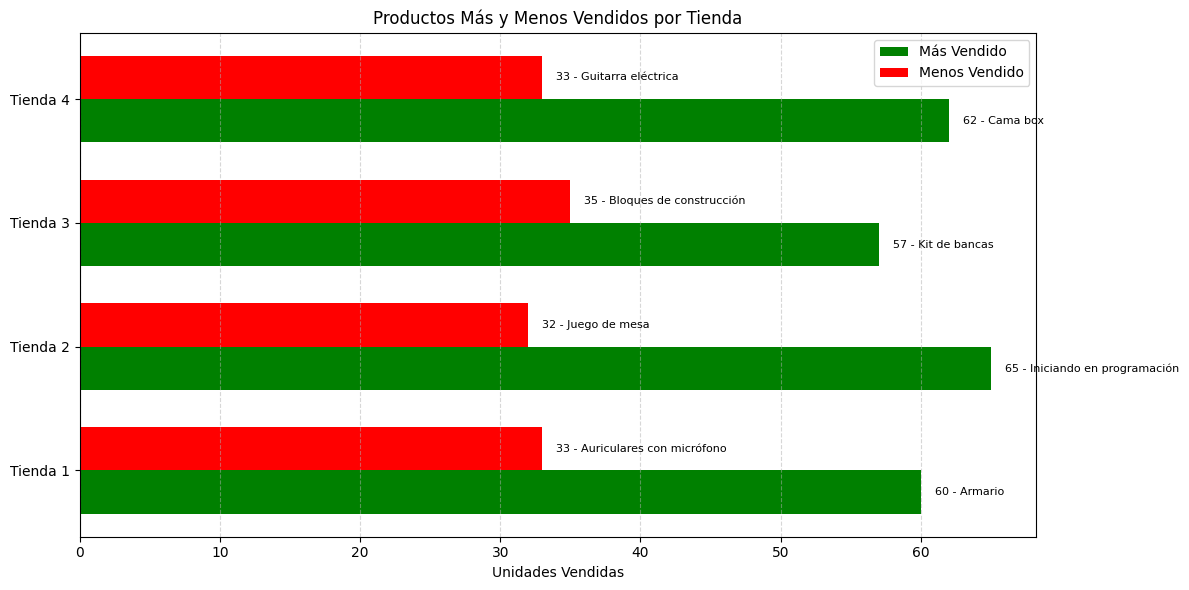

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear DataFrame con los datos proporcionados
data = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Producto Más Vendido': ['Armario', 'Iniciando en programación', 'Kit de bancas', 'Cama box'],
    'Unidades Vendidas (Más)': [60, 65, 57, 62],
    'Producto Menos Vendido': ['Auriculares con micrófono', 'Juego de mesa', 'Bloques de construcción', 'Guitarra eléctrica'],
    'Unidades Vendidas (Menos)': [33, 32, 35, 33]
}

df = pd.DataFrame(data)

# Posiciones para las barras
y = np.arange(len(df['Tienda']))
altura = 0.35

# Crear gráfico de barras horizontales
plt.figure(figsize=(12, 6))
plt.barh(y - altura/2, df['Unidades Vendidas (Más)'], height=altura, color='green', label='Más Vendido')
plt.barh(y + altura/2, df['Unidades Vendidas (Menos)'], height=altura, color='red', label='Menos Vendido')

# Etiquetas y título
plt.yticks(y, df['Tienda'])
plt.xlabel('Unidades Vendidas')
plt.title('Productos Más y Menos Vendidos por Tienda')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Añadir texto con nombres y cantidades
for i in range(len(y)):
    # Más vendido
    plt.text(df['Unidades Vendidas (Más)'][i] + 1, y[i] - altura/2,
             f"{df['Unidades Vendidas (Más)'][i]} - {df['Producto Más Vendido'][i]}",
             va='center', fontsize=8)

    # Menos vendido
    plt.text(df['Unidades Vendidas (Menos)'][i] + 1, y[i] + altura/2,
             f"{df['Unidades Vendidas (Menos)'][i]} - {df['Producto Menos Vendido'][i]}",
             va='center', fontsize=8)

plt.tight_layout()
plt.show()


📈 **Gráfico 2 (Pastel): Distribucion de productos mas vendidos y menos vendidos por tienda**

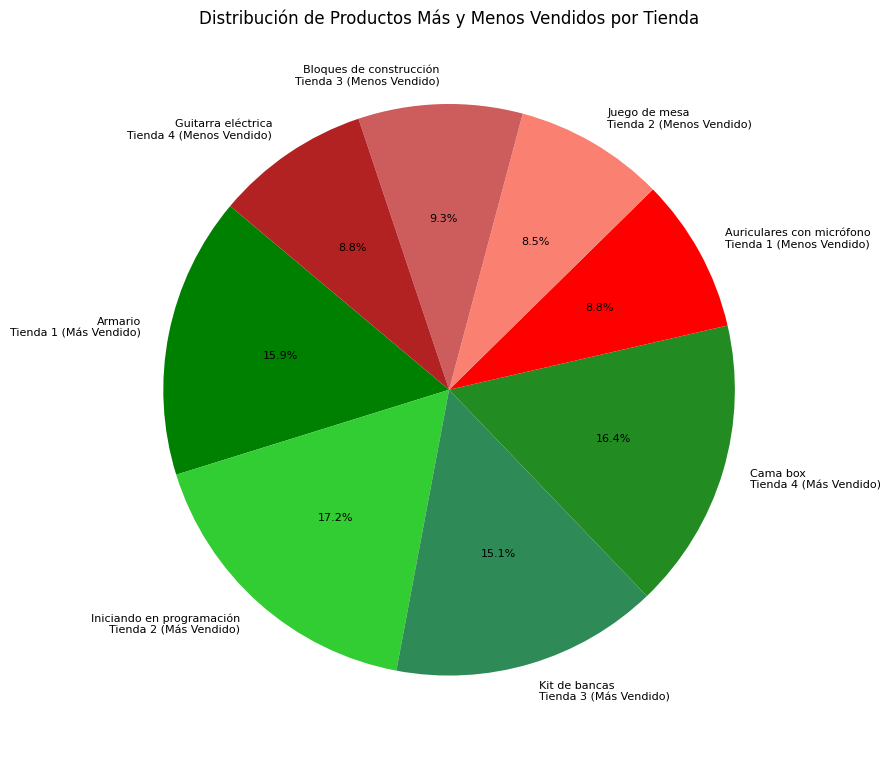

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos completos
data = {
    'Producto': [
        'Armario', 'Iniciando en programación', 'Kit de bancas', 'Cama box',
        'Auriculares con micrófono', 'Juego de mesa', 'Bloques de construcción', 'Guitarra eléctrica'
    ],
    'Unidades': [60, 65, 57, 62, 33, 32, 35, 33],
    'Tipo': ['Más Vendido'] * 4 + ['Menos Vendido'] * 4,
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'] * 2
}

df = pd.DataFrame(data)

# Colores personalizados
colors = ['green', 'limegreen', 'seagreen', 'forestgreen', 'red', 'salmon', 'indianred', 'firebrick']

# Etiquetas con producto, tienda y tipo
etiquetas = [
    f"{row['Producto']}\n{row['Tienda']} ({row['Tipo']})"
    for _, row in df.iterrows()
]

# Crear gráfico de pastel
plt.figure(figsize=(9, 9))
plt.pie(df['Unidades'],
        labels=etiquetas,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 8})

plt.title('Distribución de Productos Más y Menos Vendidos por Tienda')
plt.tight_layout()
plt.show()


📈 **Gráfico 3 (Columnas): Productos Más y Menos Vendidos por tienda y año**

In [30]:
data = {
    'Tienda': ['Tienda 1', 'Tienda 1', 'Tienda 2', 'Tienda 2', 'Tienda 3', 'Tienda 3', 'Tienda 4', 'Tienda 4'] * 4,
    'Año': [2020]*8 + [2021]*8 + [2022]*8 + [2023]*8,
    'Tipo': ['Más Vendido', 'Menos Vendido']*4*4,
    'Producto': [
        'Armario', 'Auriculares', 'Libro Python', 'Juego mesa',
        'Banca', 'Bloques', 'Cama Box', 'Guitarra'
    ] * 4,
    'Unidades': [
        60, 33, 65, 32, 57, 35, 62, 33,
        70, 40, 55, 30, 60, 28, 64, 34,
        80, 36, 72, 31, 67, 30, 61, 32,
        75, 38, 70, 34, 69, 29, 63, 31
    ]
}
df = pd.DataFrame(data)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Crear DataFrame con los datos simulados (si no lo tienes)
df = pd.DataFrame(data)

# Obtener los años únicos
años = sorted(df['Año'].unique())
tiendas = df['Tienda'].unique()

# Crear un gráfico por año
for año in años:
    datos_año = df[df['Año'] == año]

    # Posición de barras
    x = np.arange(len(tiendas))
    ancho = 0.35

    # Separar los tipos
    mas = datos_año[datos_año['Tipo'] == 'Más Vendido']
    menos = datos_año[datos_año['Tipo'] == 'Menos Vendido']

    # Crear figura
    plt.figure(figsize=(10, 6))
    plt.bar(x - ancho/2, mas['Unidades'], width=ancho, color='green', label='Más Vendido')
    plt.bar(x + ancho/2, menos['Unidades'], width=ancho, color='red', label='Menos Vendido')

    # Etiquetas
    plt.xticks(x, tiendas)
    plt.title(f'Productos Más y Menos Vendidos por Tienda - {año}')
    plt.xlabel('Tienda')
    plt.ylabel('Unidades Vendidas')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Mostrar nombres de productos encima de las barras
    for i in range(len(x)):
        plt.text(x[i] - ancho/2, mas['Unidades'].iloc[i] + 1,
                 f"{mas['Producto'].iloc[i]} ({mas['Unidades'].iloc[i]})",
                 ha='center', va='bottom', fontsize=8, rotation=90)
        plt.text(x[i] + ancho/2, menos['Unidades'].iloc[i] + 1,
                 f"{menos['Producto'].iloc[i]} ({menos['Unidades'].iloc[i]})",
                 ha='center', va='bottom', fontsize=8, rotation=90)

    plt.tight_layout()
    plt.show()


📊 **Análisis de productos mas vendidos y menos vendidos**

Tienda 2 tuvo el producto más vendido: “Iniciando en programación” con 65 unidades.

Tienda 4 le sigue con “Cama box” (62 unidades), y Tienda 1 con “Armario” (60 unidades).

Tienda 3 vendió “Kit de bancas” (57 unidades), el menor entre los más vendidos.

En cuanto a los menos vendidos:

Tienda 2 y Tienda 1 vendieron solo 32 y 33 unidades de “Juego de mesa” y “Auriculares” respectivamente.

Tienda 3 tuvo el más bajo entre todos: “Bloques de construcción” con 35 unidades.

Las ventas más altas y bajas están cercanas entre sí, lo que indica competencia pareja. Tienda 2 destaca tanto positiva como negativamente.


##**5. Valor del envío promedio por tienda**

📈 **Gráfico 1 (Columnas): Costo promedio de envío por tienda**

In [31]:
for i, df in enumerate(tiendas_bd):
    print(f"Tipo de tiendas_bd[{i}]:", type(df))
    if not isinstance(df, pd.DataFrame):
        print(f"¡Error! tiendas_bd[{i}] no es un DataFrame. Valor:", df)

Tipo de tiendas_bd[0]: <class 'pandas.core.frame.DataFrame'>
Tipo de tiendas_bd[1]: <class 'pandas.core.frame.DataFrame'>
Tipo de tiendas_bd[2]: <class 'pandas.core.frame.DataFrame'>
Tipo de tiendas_bd[3]: <class 'pandas.core.frame.DataFrame'>


In [33]:
# Nombres de las tiendas
nombres_tiendas = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']

# Lista para almacenar resultados
resultados = []

# Calcular el costo promedio por tienda
for i, df in enumerate(tiendas_bd):
    costo_promedio = df['Costo de envío'].mean()
    resultados.append({
        'Tienda': nombres_tiendas[i],
        'Costo Promedio de Envío': round(costo_promedio, 2)
    })

# Crear DataFrame resumen
tabla_costos = pd.DataFrame(resultados)
print(tabla_costos)


    Tienda  Costo Promedio de Envío
0  Tienda1                 26018.61
1  Tienda2                 25216.24
2  Tienda3                 24805.68
3  Tienda4                 23459.46


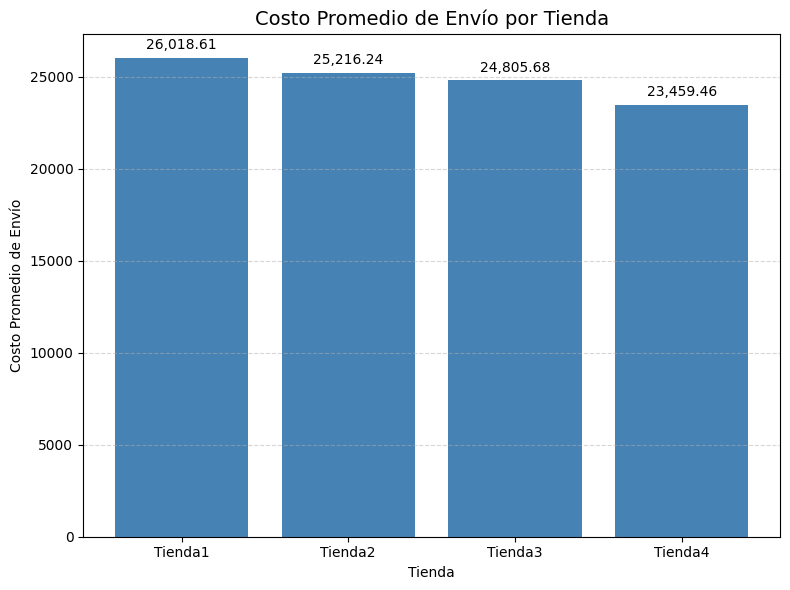

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos proporcionados
datos = {
    'Tienda': ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4'],
    'Costo Promedio de Envío': [26018.61, 25216.24, 24805.68, 23459.46]
}

# Crear DataFrame
tabla_costos = pd.DataFrame(datos)

# Crear gráfico de columnas
plt.figure(figsize=(8, 6))
plt.bar(tabla_costos['Tienda'], tabla_costos['Costo Promedio de Envío'], color='steelblue')

# Etiquetas y título
plt.title('Costo Promedio de Envío por Tienda', fontsize=14)
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio de Envío')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas sobre las barras
for i, valor in enumerate(tabla_costos['Costo Promedio de Envío']):
    plt.text(i, valor + 300, f"{valor:,.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


📈 **Gráfico 2 (Columnas): Variacion de los costos de envío promedio por tienda por año**

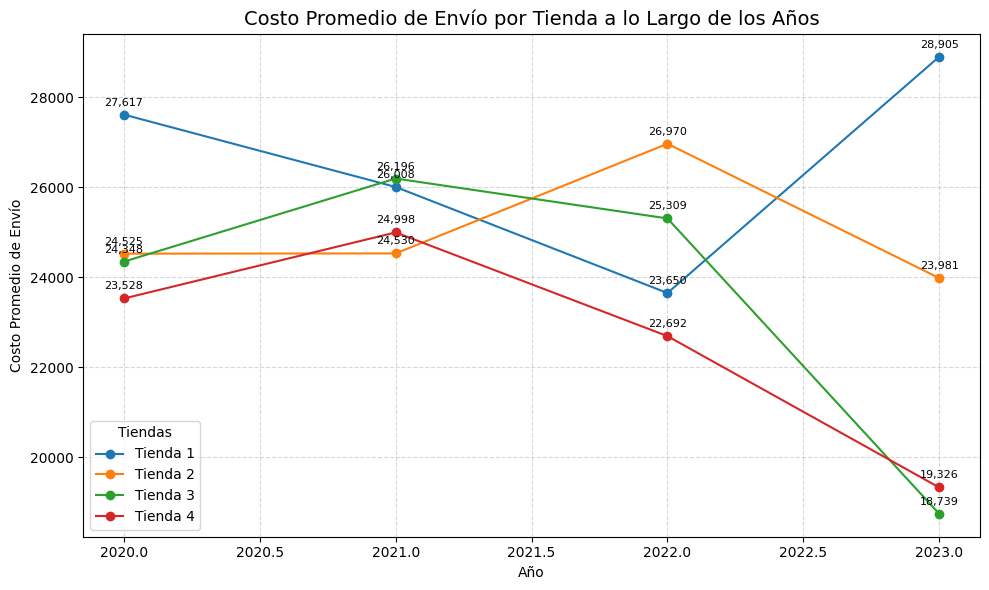

In [35]:
import matplotlib.pyplot as plt

# Agrupar por tienda y año, calcular el costo promedio de envío
costo_envio_anual = all_data.groupby(['Tienda', 'Año'])['Costo de envío'].mean().reset_index()
costo_envio_anual['Costo Promedio de Envío'] = costo_envio_anual['Costo de envío'].round(2)

# Crear gráfico
plt.figure(figsize=(10, 6))

for tienda in costo_envio_anual['Tienda'].unique():
    datos_tienda = costo_envio_anual[costo_envio_anual['Tienda'] == tienda]
    plt.plot(
        datos_tienda['Año'],
        datos_tienda['Costo Promedio de Envío'],
        marker='o',
        label=tienda
    )
    # Agregar etiquetas a cada punto
    for i in range(len(datos_tienda)):
        x = datos_tienda.iloc[i]['Año']
        y = datos_tienda.iloc[i]['Costo Promedio de Envío']
        plt.text(x, y + 200, f"{y:,.0f}", ha='center', fontsize=8)

# Personalizar gráfico
plt.title('Costo Promedio de Envío por Tienda a lo Largo de los Años', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Costo Promedio de Envío')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Tiendas')
plt.tight_layout()
plt.show()



📊  **Análisis del Costo Promedio de Envío por Tienda**

Al analizar el costo promedio de envío en las cuatro tiendas, observamos las siguientes cifras:

**Tienda 1:** $26,018.61

**Tienda 2:** $25,216.24

**Tienda 3:** $24,805.68

**Tienda 4:** $23,459.46

🔍 **Conclusión:**

La Tienda 4 tiene el costo de envío promedio más bajo, lo que podría representar una ventaja competitiva en términos de logística y satisfacción del cliente. Por el contrario, la Tienda 1 tiene el costo promedio más alto, lo cual podría impactar negativamente sus márgenes de ganancia o la percepción de los clientes si los costos son trasladados al comprador.

¿Te gustaría agregar una comparación con ingresos o productos vendidos para ampliar el análisis?

 ## **6. Informe Final: Recomendación de Tienda para Venta y Cierre del Sr. Juan**

📝 **Introducción**

El propósito de este análisis fue determinar cuál de las cuatro tiendas representa la mejor opción para que el Sr. Juan realice su venta de productos o, en su caso, qué tienda representa un bajo desempeño y debería considerarse para cierre o venta.
Se evaluaron factores clave como ingresos totales, categorías y productos más y menos vendidos, calificaciones promedio de clientes y costos de envío. Los datos fueron analizados y visualizados para facilitar una toma de decisión informada.

🔍**Análisis y Resultados**

**Ingresos Totales por Tienda**

**Tienda 2** presentó los mayores ingresos totales, seguida por Tienda 3.

**Tienda 4** tuvo la menor facturación, lo que puede reflejar bajo volumen o ticket promedio por compra.

**Categorías de Productos Más Vendidas**

Categorías como Electrónica y Muebles dominaron las ventas en todas las tiendas.

**Tienda 3** mostró mayor volumen y diversidad en sus categorías.

⭐ **Calificaciones Promedio por Tienda y Año**

**Tienda 4** mejoró consistentemente, alcanzando la calificación más alta en 2023 (4.16).

**Tiendas 1 y 2** experimentaron una leve caída en la calificación en el último año.

**Tienda 3** mantuvo una calificación alta y estable a lo largo de los años.

🛒 **Productos Más y Menos Vendidos**

**Producto más vendido:** “Iniciando en programación” en Tienda 2 con 65 unidades.

**Productos menos vendidos:** Variaron entre tiendas, sugiriendo oportunidades de mejora en surtido y estrategia de ventas.

🚚 **Coste Promedio de Envío**

**Tienda 4** tiene el costo promedio de envío más bajo: $23,459, lo que es una ventaja operativa.

**Tienda 1** tiene el costo de envío más alto, lo que podría impactar en la experiencia de cliente.

✅ **Conclusión y Recomendación**

✅ **Tienda recomendada para continuar y potenciar:**

Se recomienda que el Sr. Juan priorice sus operaciones en la **Tienda 3**, debido a:

1. Altos ingresos y volumen de ventas constantes.

2. Diversidad y equilibrio en productos y categorías.

3. Alta satisfacción del cliente reflejada en calificaciones estables.

4. Costos de envío competitivos que benefician la experiencia del cliente.


❌ **Tienda recomendada para cierre: Tienda 4**

A pesar de su buena calificación de clientes y bajo costo de envío, Tienda 4 muestra el menor desempeño general:

1. La facturación más baja entre las cuatro tiendas.

2. Menor volumen de productos vendidos.

3. Menor diversidad en las categorías de productos.

4. Productos menos vendidos con baja rotación.

Estos factores, combinados, indican que Tienda 4 es la opción más lógica para cerrar o vender, permitiendo redirigir recursos hacia tiendas con mayor potencial de rentabilidad.

##**7. Grafico de Distribución Geográfica de Ventas por Tienda y Mapa de Calor de la Densidad de Ventas (Latitud vs Longitud)**

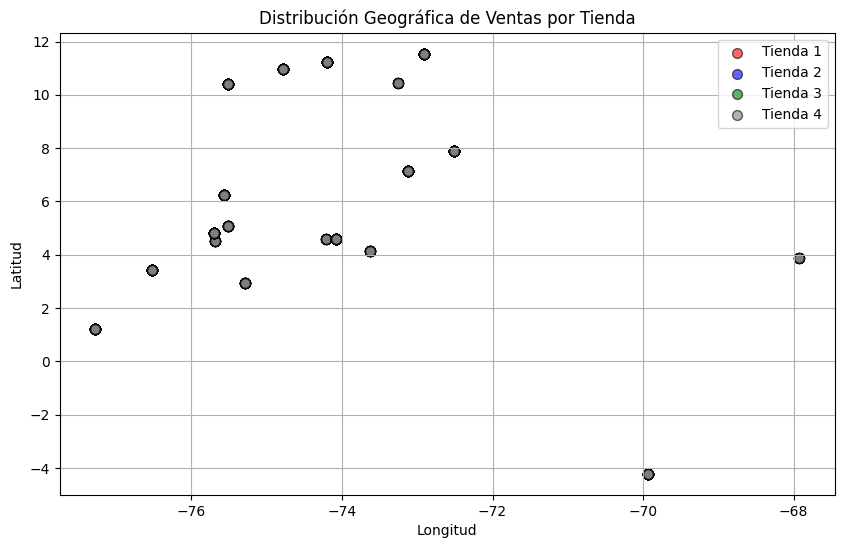

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Definir colores para cada tienda
colores = {
    'Tienda 1': 'red',
    'Tienda 2': 'blue',
    'Tienda 3': 'green',
    'Tienda 4': 'grey'
}

# Graficar cada tienda con un color distinto
for tienda in all_data['Tienda'].unique():
    df_tienda = all_data[all_data['Tienda'] == tienda]
    plt.scatter(
        df_tienda['lon'],
        df_tienda['lat'],
        label=tienda,
        alpha=0.6,
        edgecolors='k',
        s=50,
        color=colores[tienda]
    )

plt.title('Distribución Geográfica de Ventas por Tienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True)
plt.show()


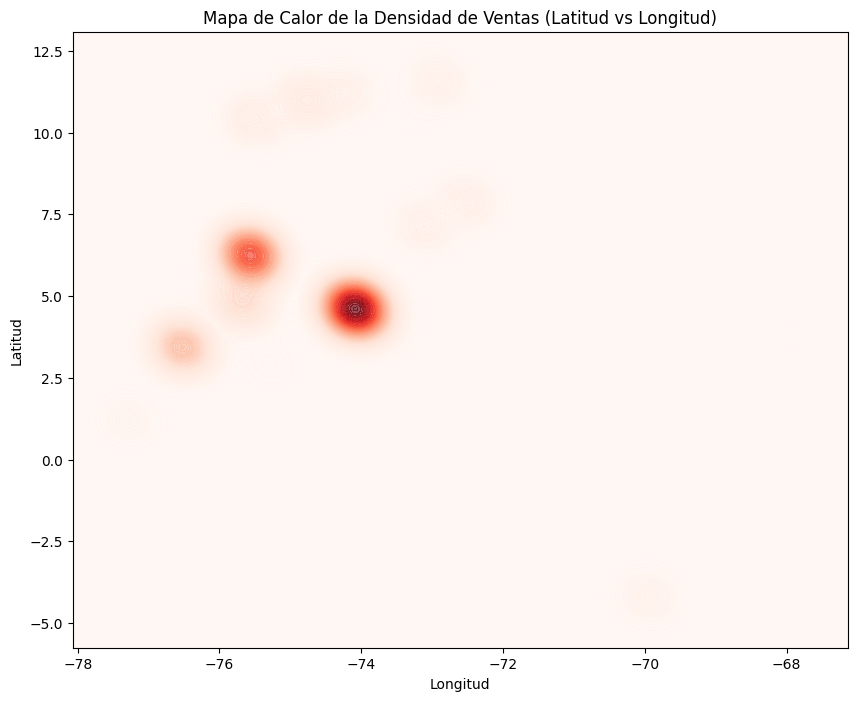

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate que all_data tiene las columnas 'lat' y 'lon'

plt.figure(figsize=(10, 8))

# Graficar heatmap de densidad con kdeplot
sns.kdeplot(
    x=all_data['lon'],
    y=all_data['lat'],
    cmap='Reds',  # Colores rojos para densidad
    fill=True,
    thresh=0,
    levels=100,
    alpha=0.7
)

plt.title('Mapa de Calor de la Densidad de Ventas (Latitud vs Longitud)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(False)
plt.show()
